### Decision Tree

In [1]:
# importing liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier

In [3]:
X = [[0,0], [1,0]]
y = [0,1]

In [4]:
classifier = tree.DecisionTreeClassifier()


In [5]:
classifier = classifier.fit(X,y)

In [6]:
classifier.predict([[2,2]])

array([1])

In [7]:
classifier.predict_proba([[2,2]])

array([[0., 1.]])

In [8]:
classifier.predict([[2,2]], [1,0])

array([1])

In [9]:
classifier.predict_proba([[2,2]], [1,0])

array([[0., 1.]])

In [10]:
# Applying with iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [11]:
ds = pd.DataFrame(iris.data, columns=iris.feature_names)
ds['target'] = iris.target
ds.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [39]:
X= ds[['sepal length (cm)', 'sepal width (cm)']]
y = ds['target']

In [40]:
classifier_tree = tree.DecisionTreeClassifier().fit(X,y)

In [41]:
# Export Graph
from sklearn.tree import export_graphviz
export_graphviz(classifier_tree, out_file='tree.dot', feature_names=X.columns,class_names=iris.target_names, filled=True, rounded=True, special_characters=True)


<img src='tree.png' width =50%>

In [42]:
import graphviz

In [43]:
dot_graph =tree.export_graphviz(classifier_tree, out_file=None, feature_names=X.columns, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)

In [ ]:
graph = graphviz.Source(dot_graph)
graph

In [45]:
# Visualize decision boundary

Xv = X.values.reshape(-1,1)
h = .02
x_min, x_max = Xv.min() - 1, Xv.max() + 1
y_min, y_max = y.min() , y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))



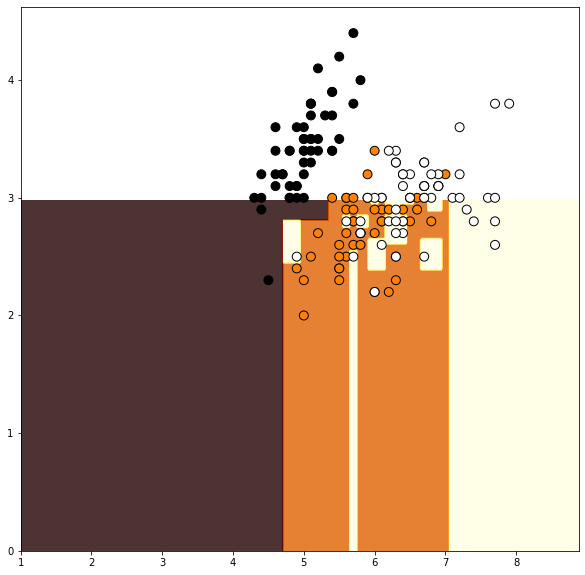

In [49]:
z = classifier_tree.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(10,10))
plt.contourf(xx, yy, z, cmap='afmhot', alpha=0.8)
plt.scatter(X.values[:,0], X.values[:,1], c=y, cmap='afmhot',s=80,edgecolors='k')
